# INTRODUCTION
This project focuses on cleaning and analyzing social media text data to identify patterns related to hate speech using basic text processing techniques.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Load Dataset

In [3]:
df = pd.read_csv("en_Hasoc2021_train.csv")
df.head(29)

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN
5,1506,60c5d6bf5659ea5e55defc58,@ilyhiguchi DICK,HOF,PRFN
6,2298,60c5d6bf5659ea5e55df0132,Why to blame only Modi or Government for this ...,NOT,NONE
7,309,60c5d6bf5659ea5e55def378,The report on @TheLeadCNN that @clarissaward f...,NOT,NONE
8,3582,60c5d6bf5659ea5e55def54f,"@Chahal_Shekhar Sorry we won't, why can't your...",HOF,HATE
9,2139,60c5d6bf5659ea5e55df0086,People are dying even in villages where there'...,NOT,NONE


## Dataset Overview

In [6]:
df.shape                     #Shape of the dataset
df.info()                    #Column description
df['task_1'].value_counts()  #Target variable distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3843 non-null   int64 
 1   _id         3843 non-null   object
 2   text        3843 non-null   object
 3   task_1      3843 non-null   object
 4   task_2      3843 non-null   object
dtypes: int64(1), object(4)
memory usage: 150.2+ KB


task_1
HOF    2501
NOT    1342
Name: count, dtype: int64

# DATA CLEANING

In [10]:
def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r"http\S+", "", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)    # remove special characters
    return text

clean_text('@30iPpgStmILw0SI @ChinaDaily #ChineseVirus #Wu...')

#why clean text? Because: URLs = useless,Special symbols = noise,Capital letters = inconsistent

'ippgstmilwsi chinadaily chinesevirus wu'

## Apply Cleaning

In [11]:
df['clean_text'] = df['text'].apply(clean_text)
df['clean_text']

# why used = It cleans every text row one by one and saves the cleaned text in a new column.

0       wealth if you made it through this ampamp were...
1       technically thats still turning back the clock...
2       vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3        krtoprakyigit soldier of japan who has dick head
4       blueheartedly youd be better off asking who do...
                              ...                        
3838    bbcnews let the dog deal with the wanker once ...
3839    india has suffered a lot that chinese bastard ...
3840    people didnt give  seats majority to bjp to se...
3841    kanganateam this is such a vile xenophobic and...
3842    ippgstmilwsi chinadaily chinesevirus wuhanviru...
Name: clean_text, Length: 3843, dtype: object

# CREATE SIMPLE FEATURES

## 1. Text Length

In [12]:
df['text_length'] = df['clean_text'].apply(len)
df['text_length'].head(29)

#This creates a new column that stores the total number of characters in each cleaned text.

0     204
1      57
2     316
3      48
4      82
5      15
6     163
7     235
8     242
9     270
10    233
11    228
12    271
13     75
14    265
15    107
16     67
17     46
18    264
19     31
20     78
21    106
22    239
23    235
24     99
25     11
26     48
27    230
28     59
Name: text_length, dtype: int64

## 2. Word Count

In [13]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['word_count']

#This creates a new column that counts the number of words in each cleaned text.

0       37
1        9
2       50
3        8
4       14
        ..
3838    12
3839    14
3840    30
3841    30
3842    12
Name: word_count, Length: 3843, dtype: int64

# VISUALIZATION

## count plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18496\2115206760.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='task_1', data=df,palette='bwr')


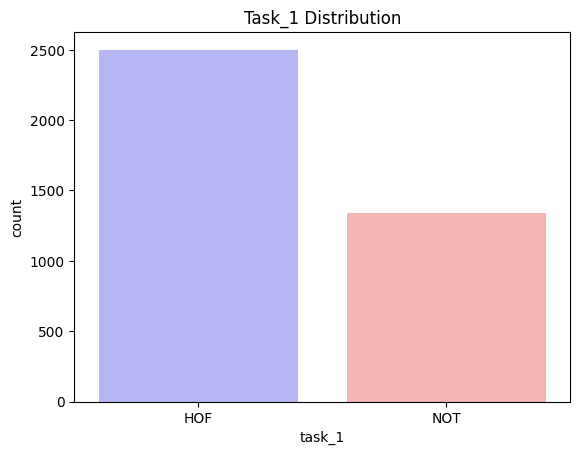

In [45]:
sns.countplot(x='task_1', data=df,palette='bwr')
plt.title("Task_1 Distribution")
plt.show()

#“This plot shows how many text samples belong to each label category.”

# Boxplot

C:\Users\hp\AppData\Local\Temp\ipykernel_18044\1468312485.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='task_1', y='word_count', data=df,palette='viridis')


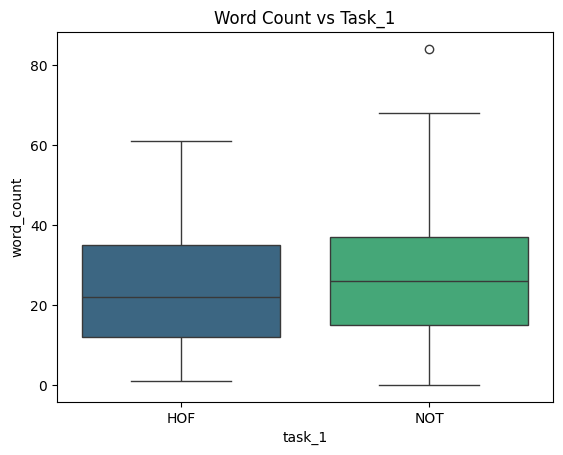

In [14]:
sns.boxplot(x='task_1', y='word_count', data=df,palette='viridis')
plt.title("Word Count vs Task_1")
plt.show()

#The boxplot shows how word counts differ between offensive and non-offensive texts.

# Histogram

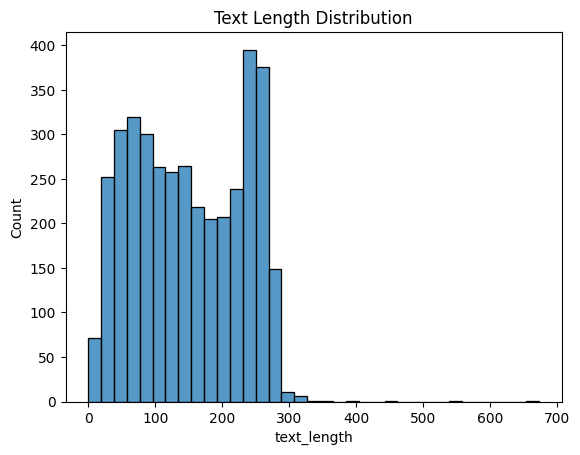

In [16]:
sns.histplot(df['text_length'])
plt.title("Text Length Distribution")
plt.show()

#“The histogram shows that most texts are short to medium in length, with a right-skewed distribution and a few long outliers.”